In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pathlib import Path

import qng

In [2]:
%matplotlib inline

## Data reading and prep

In [3]:
obsim_mm_means_df = pd.read_csv('../analysis_exp9_tandem05_nodischadj/mmdata/obsim_mm_means_df.csv', index_col=0)
obsim_mm_means_df

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,...,condmeantime_blockedbyldr_approx,condmeantime_blockedbyldr_sim,condmeantime_blockedbypp_approx,condmeantime_blockedbypp_sim,ldr_effmean_svctime_approx,ldr_effmean_svctime_sim,prob_blockedby_ldr_approx,prob_blockedby_ldr_sim,prob_blockedby_pp_approx,prob_blockedby_pp_sim
1,1,0.20,0.999950,0.950000,0.950000,2.739726,0.1,0.5,0.5,2,...,3.777411,3.302721,6.360755,6.401959,11.910124,11.915456,0.055045,0.051427,2.319907e-02,0.021741
2,2,0.20,0.999950,0.950000,0.850000,2.739726,0.1,0.5,0.5,2,...,4.025554,4.516602,8.685350,8.924706,12.465833,12.460024,0.063434,0.064167,1.037940e-01,0.096679
3,3,0.20,0.999950,0.950000,0.750000,2.739726,0.1,0.5,0.5,2,...,4.480172,6.928997,11.090321,11.186948,13.419348,13.264692,0.079524,0.086926,2.001325e-01,0.186347
4,4,0.20,0.999950,0.850000,0.950000,2.739726,0.1,0.5,0.5,2,...,5.222543,4.409709,6.360755,6.459064,11.252472,11.513514,0.165739,0.162672,2.319907e-02,0.021980
5,5,0.20,0.999950,0.850000,0.850000,2.739726,0.1,0.5,0.5,2,...,5.581905,5.217347,8.685350,8.377886,11.706673,11.877527,0.181751,0.176401,1.037940e-01,0.098517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,0.25,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.000000,1.351404,0.000000,11.999993,12.008200,0.000009,0.000000,1.235314e-08,0.000000
147,147,0.30,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.050268,1.328353,0.000000,11.999993,12.008225,0.000009,0.000009,1.933882e-09,0.000000
148,148,0.20,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.043137,1.184546,0.000000,11.999996,12.002392,0.000006,0.000003,1.769363e-08,0.000000
149,149,0.25,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.047906,1.158626,0.000000,11.999996,12.003488,0.000006,0.000004,2.147217e-09,0.000000


In [4]:
obsim_mm_means_df.columns.to_list()

['scenario',
 'tot_c_rate',
 'acc_tar_obs',
 'acc_tar_ldr',
 'acc_tar_pp',
 'daily_arr_rate',
 'alos_obs',
 'alos_ldr_1',
 'alos_ldr_2',
 'alos_pp_noc',
 'alos_pp_c',
 'load_obs',
 'load_ldr',
 'load_pp',
 'cap_obs',
 'cap_ldr',
 'cap_pp',
 'lam_obs',
 'lam_ldr',
 'lam_pp',
 'alos_ldr',
 'alos_pp',
 'rho_obs',
 'rho_ldr',
 'rho_pp',
 'cv2_obs',
 'cv2_ldr',
 'cv2_pp',
 'num_visits_obs_mean',
 'num_visits_ldr_mean',
 'num_visits_pp_mean',
 'num_visits_csect_mean',
 'planned_los_mean_mean_obs',
 'planned_los_mean_mean_ldr',
 'planned_los_mean_mean_pp',
 'planned_los_mean_mean_csect',
 'actual_los_mean_mean_obs',
 'actual_los_mean_mean_ldr',
 'actual_los_mean_mean_pp',
 'actual_los_mean_mean_csect',
 'planned_los_cv2_mean_obs',
 'planned_los_cv2_mean_ldr',
 'planned_los_cv2_mean_pp',
 'planned_los_cv2_mean_csect',
 'actual_los_cv2_mean_obs',
 'actual_los_cv2_mean_ldr',
 'actual_los_cv2_mean_pp',
 'actual_los_cv2_mean_csect',
 'planned_los_skew_mean_obs',
 'planned_los_skew_mean_ldr',
 'pla

In [5]:
check_blocking_cols = ['mean_blocked_by_pp_mean', 'condmeantime_blockedbypp_sim', 
                       'prob_blockedby_pp_sim', 'prob_blockedby_pp_approx', 'prob_blockedby_ldr_approx']
obsim_mm_means_df.loc[:, check_blocking_cols]

,mean_blocked_by_pp_mean,condmeantime_blockedbypp_sim,prob_blockedby_pp_sim,prob_blockedby_pp_approx,prob_blockedby_ldr_approx
1,6.401959,6.401959,0.021741,2.319907e-02,0.055045
2,8.924706,8.924706,0.096679,1.037940e-01,0.063434
3,11.186948,11.186948,0.186347,2.001325e-01,0.079524
4,6.459064,6.459064,0.021980,2.319907e-02,0.165739
5,8.377886,8.377886,0.098517,1.037940e-01,0.181751
...,...,...,...,...,...
146,0.000000,0.000000,0.000000,1.235314e-08,0.000009
147,0.000000,0.000000,0.000000,1.933882e-09,0.000009
148,0.000000,0.000000,0.000000,1.769363e-08,0.000006
149,0.000000,0.000000,0.000000,2.147217e-09,0.000006


In [6]:
[c for c in obsim_mm_means_df.columns.to_list() if '_pp' in c]

['acc_tar_pp',
 'alos_pp_noc',
 'alos_pp_c',
 'load_pp',
 'cap_pp',
 'lam_pp',
 'alos_pp',
 'rho_pp',
 'cv2_pp',
 'num_visits_pp_mean',
 'planned_los_mean_mean_pp',
 'actual_los_mean_mean_pp',
 'planned_los_cv2_mean_pp',
 'actual_los_cv2_mean_pp',
 'planned_los_skew_mean_pp',
 'actual_los_skew_mean_pp',
 'planned_los_kurt_mean_pp',
 'actual_los_kurt_mean_pp',
 'iatime_mean_mean_pp',
 'iatime_sd_mean_pp',
 'iatime_skew_mean_pp',
 'iatime_kurt_mean_pp',
 'mean_pct_blocked_by_pp',
 'mean_blocked_by_pp_mean',
 'mean_blocked_by_pp_p95',
 'occ_mean_mean_pp',
 'occ_mean_p75_pp',
 'occ_mean_p95_pp',
 'occ_mean_var_pp',
 'util_pp',
 'prob_blockedby_pp_approx',
 'prob_blockedby_pp_sim']

In [7]:
obsim_mm_means_df.iloc[-15:, :20]

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,alos_pp_c,load_obs,load_ldr,load_pp,cap_obs,cap_ldr,cap_pp,lam_obs,lam_ldr,lam_pp
136,136,0.20,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.027397,5,9,22,2.739726,2.739726,2.739726
137,137,0.25,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.164384,5,9,22,2.739726,2.739726,2.739726
138,138,0.30,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.301370,5,9,23,2.739726,2.739726,2.739726
139,139,0.20,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.082192,7,16,45,8.219178,8.219178,8.219178
140,140,0.25,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.493151,7,16,46,8.219178,8.219178,8.219178
141,141,0.30,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.904110,7,16,48,8.219178,8.219178,8.219178
142,142,0.20,0.999995,0.999995,0.999995,13.698630,0.1,0.5,0.5,2,3,1.369863,6.849315,30.136986,9,21,65,13.698630,13.698630,13.698630
143,143,0.25,0.999995,0.999995,0.999995,13.698630,0.1,0.5,0.5,2,3,1.369863,6.849315,30.821918,9,21,68,13.698630,13.698630,13.698630
144,144,0.30,0.999995,0.999995,0.999995,13.698630,0.1,0.5,0.5,2,3,1.369863,6.849315,31.506849,9,21,70,13.698630,13.698630,13.698630
145,145,0.20,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,3,1.917808,9.589041,42.191781,11,26,84,19.178082,19.178082,19.178082


Just confirming that the arrival rate columns are identical for all three units.

In [8]:
obsim_mm_means_df.loc[:, ['lam_obs', 'lam_ldr', 'lam_pp']]

,lam_obs,lam_ldr,lam_pp
1,2.739726,2.739726,2.739726
2,2.739726,2.739726,2.739726
3,2.739726,2.739726,2.739726
4,2.739726,2.739726,2.739726
5,2.739726,2.739726,2.739726
...,...,...,...
146,19.178082,19.178082,19.178082
147,19.178082,19.178082,19.178082
148,24.657534,24.657534,24.657534
149,24.657534,24.657534,24.657534


In [9]:
obsim_mm_means_df.loc[:, ['alos_ldr_1', 'alos_ldr_2']]

,alos_ldr_1,alos_ldr_2
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
...,...,...
146,0.5,0.5
147,0.5,0.5
148,0.5,0.5
149,0.5,0.5


Create lists of columns for subsetting the main dataframe using only relevant modeling columns for each unit.

In [11]:
# Define which columns are in which matrices starting with no queueing vars
X_pp_noq_cols = ['lam_obs', 'alos_pp', 'alos_pp_noc', 'alos_pp_c',
                 'tot_c_rate', 'cap_pp']

X_ldr_noq_cols = ['lam_obs', 'alos_obs', 'alos_ldr', 'cap_ldr',
                  'alos_pp', 'alos_pp_noc', 'alos_pp_c',
                  'tot_c_rate', 'cap_pp']

X_obs_noq_cols = ['lam_obs', 'alos_obs', 'cap_obs', 'alos_ldr', 'cap_ldr',
                  'alos_pp', 'alos_pp_noc', 'alos_pp_c',
                  'tot_c_rate', 'cap_pp']

# For "basicq" matrices, only load and rho variables are added
X_pp_basicq_cols = X_pp_noq_cols.copy()
X_pp_basicq_cols.extend(['load_pp', 'rho_pp'])

X_ldr_basicq_cols = X_ldr_noq_cols.copy()
X_ldr_basicq_cols.extend(['load_ldr', 'rho_ldr', 'load_pp', 'rho_pp'])

X_obs_basicq_cols = X_obs_noq_cols.copy()
X_obs_basicq_cols.extend(['load_obs', 'rho_obs', 'load_ldr',
                          'rho_ldr', 'load_pp', 'rho_pp'])

# For "q" matrices, include additional queueing approximations (not applicable
# to PP since unaffected by upstream unit and has no downstream unit

# LDR can have LOS shortened by patients blocked in OBS and have LOS lengthened
# by patients blocked in LDR by PP
X_ldr_q_cols = X_ldr_basicq_cols.copy()
X_ldr_q_cols.extend(['prob_blockedby_pp_approx', 'condmeantime_blockedbypp_approx',
                     'prob_blockedby_ldr_approx', 'condmeantime_blockedbyldr_approx',
                     'ldr_effmean_svctime_approx'])

# OBS modeled as infinite capacity system but time in system impacted by
# congestion in the downstream units.
X_obs_q_cols = X_obs_basicq_cols.copy()
X_obs_q_cols.extend(['prob_blockedby_pp_approx', 'condmeantime_blockedbypp_approx',
                     'prob_blockedby_ldr_approx', 'condmeantime_blockedbyldr_approx',
                     'ldr_effmean_svctime_approx'])

In [12]:
# Create dataframes based on the column specs above
X_pp_noq = obsim_mm_means_df.loc[:, X_pp_noq_cols]
X_ldr_noq = obsim_mm_means_df.loc[:, X_ldr_noq_cols]
X_obs_noq = obsim_mm_means_df.loc[:, X_obs_noq_cols]

# PP
X_pp_basicq = obsim_mm_means_df.loc[:, X_pp_basicq_cols]
X_pp_basicq['sqrt_load_pp'] = X_pp_basicq['load_pp'] ** 0.5

# LDR
X_ldr_basicq = obsim_mm_means_df.loc[:, X_ldr_basicq_cols]
X_ldr_basicq['sqrt_load_ldr'] = X_ldr_basicq['load_ldr'] ** 0.5
X_ldr_basicq['sqrt_load_pp'] = X_ldr_basicq['load_pp'] ** 0.5

X_ldr_q = obsim_mm_means_df.loc[:, X_ldr_q_cols]
X_ldr_q['sqrt_load_ldr'] = X_ldr_q['load_ldr'] ** 0.5
X_ldr_q['sqrt_load_pp'] = X_ldr_q['load_pp'] ** 0.5

# OBS
X_obs_basicq = obsim_mm_means_df.loc[:, X_obs_basicq_cols]
X_obs_basicq['sqrt_load_obs'] = X_obs_basicq['load_obs'] ** 0.5
X_obs_basicq['sqrt_load_ldr'] = X_obs_basicq['load_ldr'] ** 0.5
X_obs_basicq['sqrt_load_pp'] = X_obs_basicq['load_pp'] ** 0.5

X_obs_q = obsim_mm_means_df.loc[:, X_obs_q_cols]
X_obs_q['sqrt_load_obs'] = X_obs_q['load_obs'] ** 0.5
X_obs_q['sqrt_load_ldr'] = X_obs_q['load_ldr'] ** 0.5
X_obs_q['sqrt_load_pp'] = X_obs_q['load_pp'] ** 0.5

In [13]:
# y vectors
y_pp_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_pp']
y_pp_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_pp']
y_ldr_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_ldr']
y_ldr_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_ldr']
y_obs_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_obs']
y_obs_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_obs']

y_mean_pct_blocked_by_pp = obsim_mm_means_df.loc[:, 'prob_blockedby_pp_sim']
y_mean_pct_blocked_by_ldr = obsim_mm_means_df.loc[:, 'prob_blockedby_ldr_sim']
y_condmeantime_blockedbyldr = obsim_mm_means_df.loc[:, 'condmeantime_blockedbyldr_sim']
y_condmeantime_blockedbypp = obsim_mm_means_df.loc[:, 'condmeantime_blockedbypp_sim']


In [14]:
X_ldr_q.iloc[-15:, :20]

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,condmeantime_blockedbyldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
136,2.739726,0.1,0.5,9,2.20,2,3,0.20,22,1.369863,0.152207,6.027397,0.273973,4.300025e-07,3.774664,0.000014,1.694017,11.999978,1.170411,2.455076
137,2.739726,0.1,0.5,9,2.25,2,3,0.25,22,1.369863,0.152207,6.164384,0.280199,6.200629e-07,3.841017,0.000014,1.694017,11.999978,1.170411,2.482818
138,2.739726,0.1,0.5,9,2.30,2,3,0.30,23,1.369863,0.152207,6.301370,0.273973,2.381808e-07,3.822494,0.000014,1.694017,11.999977,1.170411,2.510253
139,8.219178,0.1,0.5,16,2.20,2,3,0.20,45,4.109589,0.256849,18.082192,0.401826,7.390317e-08,2.109892,0.000007,1.042920,11.999993,2.027212,4.252316
140,8.219178,0.1,0.5,16,2.25,2,3,0.25,46,4.109589,0.256849,18.493151,0.402025,5.417211e-08,2.122492,0.000007,1.042920,11.999993,2.027212,4.300366
141,8.219178,0.1,0.5,16,2.30,2,3,0.30,48,4.109589,0.256849,18.904110,0.393836,1.542585e-08,2.103835,0.000007,1.042920,11.999993,2.027212,4.347886
142,13.698630,0.1,0.5,21,2.20,2,3,0.20,65,6.849315,0.326158,30.136986,0.463646,2.554934e-08,1.602491,0.000011,0.853312,11.999991,2.617120,5.489716
143,13.698630,0.1,0.5,21,2.25,2,3,0.25,68,6.849315,0.326158,30.821918,0.453263,5.301905e-09,1.581298,0.000011,0.853312,11.999991,2.617120,5.551749
144,13.698630,0.1,0.5,21,2.30,2,3,0.30,70,6.849315,0.326158,31.506849,0.450098,2.434485e-09,1.580926,0.000011,0.853312,11.999991,2.617120,5.613096
145,19.178082,0.1,0.5,26,2.20,2,3,0.20,84,9.589041,0.368809,42.191781,0.502283,9.508587e-09,1.330848,0.000009,0.729366,11.999993,3.096618,6.495520


In [15]:
y_pp_occ_mean

1       6.050726
2       6.017481
3       6.020065
4       6.021286
5       6.031431
         ...    
146    43.271001
147    44.317859
148    54.370029
149    55.673771
150    56.982402
Name: occ_mean_mean_pp, Length: 150, dtype: float64

In [16]:
X_pp_noq

,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp
1,2.739726,2.20,2,3,0.20,12
2,2.739726,2.20,2,3,0.20,10
3,2.739726,2.20,2,3,0.20,9
4,2.739726,2.20,2,3,0.20,12
5,2.739726,2.20,2,3,0.20,10
...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85
147,19.178082,2.30,2,3,0.30,89
148,24.657534,2.20,2,3,0.20,100
149,24.657534,2.25,2,3,0.25,105


In [18]:
X_pp_basicq

,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
1,2.739726,2.20,2,3,0.20,12,6.027397,0.502283,2.455076
2,2.739726,2.20,2,3,0.20,10,6.027397,0.602740,2.455076
3,2.739726,2.20,2,3,0.20,9,6.027397,0.669711,2.455076
4,2.739726,2.20,2,3,0.20,12,6.027397,0.502283,2.455076
5,2.739726,2.20,2,3,0.20,10,6.027397,0.602740,2.455076
...,...,...,...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85,43.150685,0.507655,6.568918
147,19.178082,2.30,2,3,0.30,89,44.109589,0.495613,6.641505
148,24.657534,2.20,2,3,0.20,100,54.246575,0.542466,7.365227
149,24.657534,2.25,2,3,0.25,105,55.479452,0.528376,7.448453


## Model building
Let's set up a pipeline to make it easy to build and evaluate models.

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, KFold
from sklearn import metrics

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

## General function

**Note:** The `neg_` prefix in the scoring metric names indicates that it's the negative of MAE and MAPE. The reason for the negative sign is just so that during cross-validation, sklearn sorts results such that a higher score is better. Obviously, this isn't true for things like MAE, MSE, MAPE.

In [20]:
def fit_summarize_mm(scenario, X, y, flavor='lm',
                  scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
                  scale=False, fit_intercept=True, n_splits=5, kfold_shuffle=True, kfold_random_state=4,
                  return_train_score=True, return_estimator=True, 
                  lasso_alpha=1.0, lasso_max_iter=1000,
                  rf_random_state=0, rf_criterion='mae', rf_min_samples_split=10):

    # Create name label lists
    partitions = ['test', 'train']
    metric_names = [f"{p}_{s}" for s in scoring for p in partitions]
    var_names = X.columns.to_list()
    flavors_w_coeffs = ['lm', 'lasso', 'lassocv', 'poly']
    flavor_estimator ={'lm': 'linearregression',
                       'lasso': 'lasso',
                       'lassocv': 'lassocv',
                       'poly': 'linearregression',
                       'spline': 'linearregression'}

    steps = []
    if scale:
        steps.append(StandardScaler())
        
    # Create flavor specific pipelines    
    if flavor == 'lm':
        steps.extend([LinearRegression(fit_intercept=fit_intercept)])   
    elif flavor == 'lasso':
        steps.extend([Lasso(alpha=lasso_alpha, fit_intercept=fit_intercept, max_iter=lasso_max_iter)])
    elif flavor == 'lassocv':
        steps.extend([LassoCV(fit_intercept=fit_intercept, max_iter=lasso_max_iter)])
    elif flavor == 'rf':
        steps.extend([RandomForestRegressor(criterion=rf_criterion, oob_score=True, min_samples_split=rf_min_samples_split, random_state=rf_random_state)])
    elif flavor == 'svr':
        steps.extend([SVR()])
    elif flavor == 'nn':
        steps.extend([MLPRegressor(max_iter=2000)])
    elif flavor == 'poly':
        steps.extend([PolynomialFeatures(2), LinearRegression(fit_intercept=fit_intercept)])
    else:
        raise ValueError(f"Unknown flavor: {flavor}")
    
    model = make_pipeline(*steps)
    
    # Run the cross validation model fitting and testing
    if not kfold_shuffle:
        kfold_random_state = None
    
    cv_iterator = KFold(n_splits=n_splits, shuffle=kfold_shuffle, random_state=kfold_random_state)
    scores = cross_validate(model, X, y, scoring=scoring,
                            cv=cv_iterator, 
                            return_train_score=return_train_score, return_estimator=return_estimator)

    
    # Extract coefficients for relevant flavors
    if flavor in flavors_w_coeffs:
        coeffs = [list(estimator.named_steps[flavor_estimator[flavor]].coef_) for estimator in scores['estimator']]
        intercept = [estimator.named_steps[flavor_estimator[flavor]].intercept_ for estimator in scores['estimator']]
    
    # Trying to get feature names for poly
    if flavor == 'poly':
        poly_features = [list(estimator.named_steps['polynomialfeatures'].get_feature_names(var_names)) 
                         for estimator in scores['estimator']][0]
            
    # Extract alphas for lassocv
    alphas = []
    if flavor == 'lassocv':        
        alphas = [estimator.named_steps['lassocv'].alpha_ for estimator in scores['estimator']]
    
    # Extract metrics
    metrics = {metric:scores[metric] for metric in metric_names}
    metrics_df = pd.DataFrame(metrics)
    
    # Create predictions
    predictions = cross_val_predict(model, X, y)
    
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.scatter(y, predictions)
    ax.axline((0,0), slope=1)
    ax.set_xlabel('actual')  # Add an x-label to the axes.
    ax.set_ylabel('predicted')  # Add a y-label to the axes.
    ax.set_title("cross_val_predict")  # Add a title to the axes.
    
    # Create flavor specific results dictionaries (e.g. rf doesn't have coeffs)
    if flavor in flavors_w_coeffs:
        # If poly, need to construct var_names
        if flavor == 'poly':
            poly_features = [list(estimator.named_steps['polynomialfeatures'].get_feature_names(var_names)) 
                         for estimator in scores['estimator']][0]
            
            # Change '1' to 'intercept'
            poly_features[0] = 'intercept'
            
            coeffs_df = pd.DataFrame(coeffs)
            x_shape = coeffs_df.shape
            # Name the columns
            coeffs_df.columns = poly_features
        else:
            coeffs_df = pd.DataFrame(coeffs, columns=var_names)
            x_shape = coeffs_df.shape
            coeffs_df['intercept'] = intercept
            # Reorder columns to get last column (intercept) to be first
            n_cols = coeffs_df.shape[1]
            new_col_order = [_ for _ in range(0, n_cols - 1)]
            new_col_order.insert(0, n_cols - 1)
            coeffs_df = coeffs_df.iloc[:, new_col_order]
            
        if scale:
            scaling_factors = np.array([list(estimator.named_steps['standardscaler'].scale_) for estimator in scores['estimator']]) 
        else:
            scaling_factors = np.ones(x_shape)
        
        # terms corresponding to features
        if flavor == 'poly':
            unscaled_coeffs_df = coeffs_df.iloc[:, :] / scaling_factors
        else:
            unscaled_coeffs_df1 = coeffs_df.iloc[:, 1:] / scaling_factors
            # intercept
            unscaled_coeffs_df2 = coeffs_df.iloc[:, [0]] 
            # Put them together with intercept as first column
            unscaled_coeffs_df = pd.concat([unscaled_coeffs_df2, unscaled_coeffs_df1], axis=1)


        results = {'scenario': scenario,
                   'coeffs_df': unscaled_coeffs_df,
                   'metrics_df': metrics_df,
                   'scaling': scaling_factors,
                   'scaled_coeffs_df': coeffs_df,
                   'alphas': alphas,
                   'predictions': predictions,
                   'plot': fig}
    else:
        results = {'scenario': scenario,
                   'metrics_df': metrics_df,
                   'predictions': predictions,
                   'plot': fig}
        
    return results


In [21]:
def prediction_scatter(y, predictions):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.scatter(y, predictions)
    ax.axline((0,0), slope=1)
    ax.set_xlabel('actual')  # Add an x-label to the axes.
    ax.set_ylabel('predicted')  # Add a y-label to the axes.
    ax.set_title("general predict vs actual scatter")  # Add a title to the axes.
    return fig

In [22]:
def coeffs_by_fold(coeffs_df, col_wrap=5, sharey=False):
    coeffs = coeffs_df.melt(var_name='coeff', value_name='value', ignore_index=False)
    coeffs.reset_index(drop=False, inplace=True)
    coeffs.rename(columns={'index': 'fold'}, inplace=True)
    g = sns.FacetGrid(coeffs, col="coeff", col_wrap=col_wrap, sharey=sharey)
    g.map_dataframe(sns.barplot, x="fold", y="value")
    g.set_titles('{col_name}')
    return g

## Preliminary modeling test test fit_summarize_lm function
Let's build models for pp mean occupancy using q, noq, and load data. 

* linear regression with and without input scaling
* lasso

We want to make sure that our general analysis pipeline is working and that we can recover coefficients in unscaled form after using input scaling.

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,-0.440495,0.014290,0.154397,-1.110223e-16,8.326673e-17,0.154397,0.001196,0.993989,0.078557,0.008088
1,-0.568812,0.035723,0.190935,-3.330669e-16,1.665335e-16,0.190935,0.001708,0.983098,0.123553,0.012698
2,-0.383539,0.018184,0.132603,5.551115e-16,-2.498002e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,-0.475844,0.018118,0.160202,0.000000e+00,-2.775558e-17,0.160202,0.001317,0.991182,0.091316,0.015805
4,-0.479379,0.022000,0.165727,5.551115e-16,-2.775558e-17,0.165727,0.001590,0.990018,0.097166,0.007735


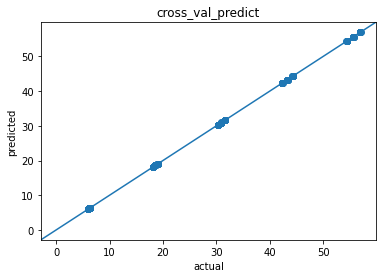

In [25]:
pp_occ_mean_basicq_lm_results = fit_summarize_mm('pp_occ_mean_q_lm', X_pp_basicq, y_pp_occ_mean, scale=False, flavor='lm')
pp_occ_mean_basicq_lm_results['coeffs_df']

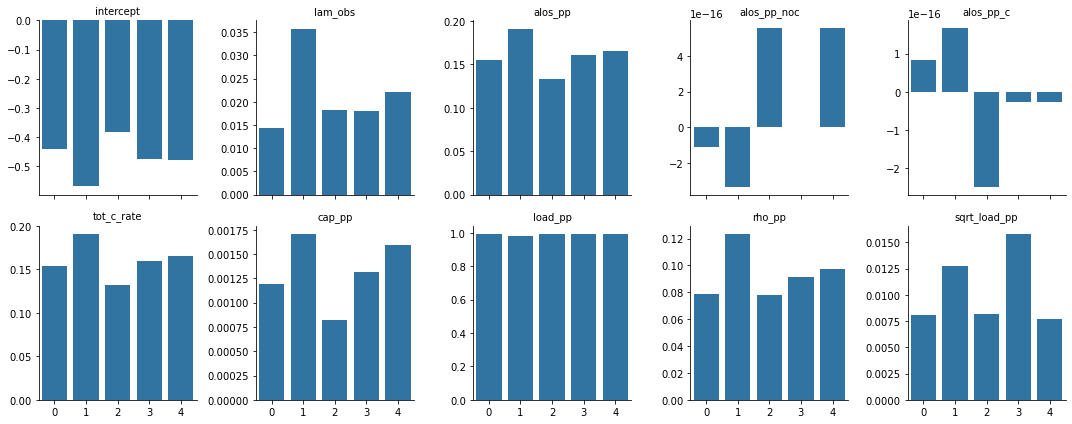

In [26]:
coeffs_by_fold(pp_occ_mean_basicq_lm_results['coeffs_df'])

In [27]:
pp_occ_mean_basicq_lm_results['scaled_coeffs_df']

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,-0.440495,0.014290,0.154397,-1.110223e-16,8.326673e-17,0.154397,0.001196,0.993989,0.078557,0.008088
1,-0.568812,0.035723,0.190935,-3.330669e-16,1.665335e-16,0.190935,0.001708,0.983098,0.123553,0.012698
2,-0.383539,0.018184,0.132603,5.551115e-16,-2.498002e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,-0.475844,0.018118,0.160202,0.000000e+00,-2.775558e-17,0.160202,0.001317,0.991182,0.091316,0.015805
4,-0.479379,0.022000,0.165727,5.551115e-16,-2.775558e-17,0.165727,0.001590,0.990018,0.097166,0.007735


In [28]:
pp_occ_mean_basicq_lm_results['scaling']

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

If we scale the data, then returned coefficients are in scaled units. **UPDATE** Removed all code related to scaling y. While it wasn't the right approach, I did learn how to use the `TransformedTargetRegressor` class which can wrap a `Pipeline` object and do some y transformation such as log(y). 

https://stackoverflow.com/questions/31029340/how-to-adjust-scaled-scikit-learn-logicistic-regression-coeffs-to-score-a-non-sc

In [29]:
pp_occ_mean_basicq_lm_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.028836,-0.025057,-0.001010,-0.001035,0.999993,0.999997
1,-0.026055,-0.025493,-0.001483,-0.000913,0.999996,0.999996
2,-0.023516,-0.025958,-0.000903,-0.001058,0.999997,0.999996
3,-0.027501,-0.025378,-0.000908,-0.001063,0.999994,0.999996
4,-0.026845,-0.025633,-0.001064,-0.001025,0.999997,0.999996


### Analysis note
Obviously we can't really interpet some of the coefficients because they are related. We can't change the arrival rate or LOS without affecting load and rho.

Now let's do linear regression but with scaled X matrix.

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,30.537265,0.114786,0.006086,1.998401e-14,1.509903e-14,0.006086,0.031563,17.947534,0.008310,0.014730
1,32.459013,0.268108,0.007742,1.865175e-14,-3.552714e-15,0.007742,0.042104,16.606836,0.011598,0.021009
2,29.871882,0.139485,0.005512,-2.442491e-14,-8.881784e-16,0.005512,0.020649,17.143831,0.008041,0.014260
3,30.949432,0.143294,0.006700,2.708944e-14,-1.776357e-15,0.006700,0.033526,17.671902,0.009062,0.028130
4,30.814709,0.166525,0.006720,6.217249e-15,2.220446e-15,0.006720,0.038835,16.885637,0.009679,0.013220


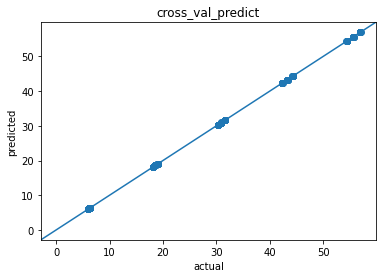

In [30]:
pp_occ_mean_basicq_lm_scaled_results = fit_summarize_mm('pp_occ_mean_q_lm', 
                                                   X_pp_basicq, y_pp_occ_mean, scale=True, flavor='lm')
pp_occ_mean_basicq_lm_scaled_results['scaled_coeffs_df']

As expected, the `load_pp` variable has dominating coefficient.

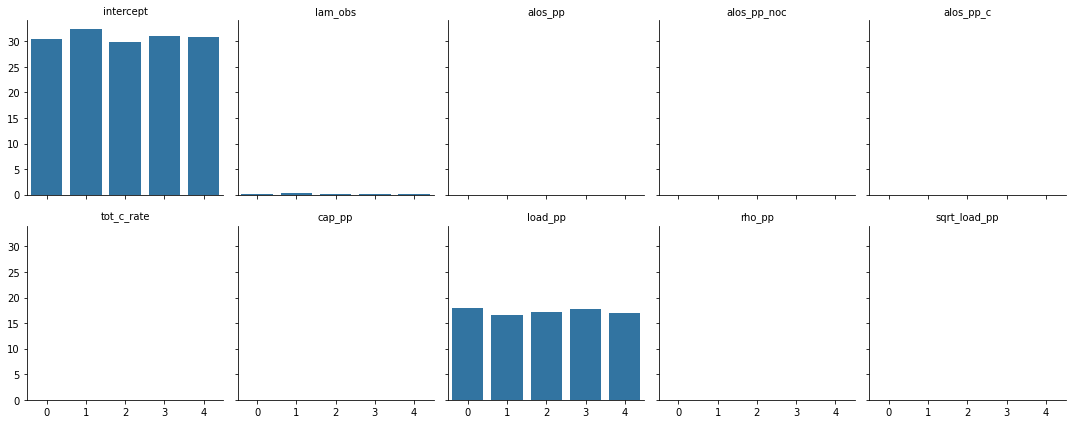

In [31]:
coeffs_by_fold(pp_occ_mean_basicq_lm_scaled_results['scaled_coeffs_df'], sharey=True)

In [32]:
pp_occ_mean_basicq_lm_scaled_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.028836,-0.025057,-0.001010,-0.001035,0.999993,0.999997
1,-0.026055,-0.025493,-0.001483,-0.000913,0.999996,0.999996
2,-0.023516,-0.025958,-0.000903,-0.001058,0.999997,0.999996
3,-0.027501,-0.025378,-0.000908,-0.001063,0.999994,0.999996
4,-0.026845,-0.025633,-0.001064,-0.001025,0.999997,0.999996


In [33]:
print(pp_occ_mean_basicq_lm_scaled_results['scaling'])

[[ 8.03237751  0.03942072  1.          1.          0.03942072 26.38541132
  18.05606418  0.10577836  1.8212263 ]
 [ 7.50513262  0.04054961  1.          1.          0.04054961 24.65150294
  16.89235136  0.09387236  1.65451922]
 [ 7.67068926  0.04156446  1.          1.          0.04156446 25.06225582
  17.27116508  0.10265413  1.74529655]
 [ 7.9089078   0.0418247   1.          1.          0.0418247  25.45049115
  17.82912659  0.09924083  1.77980585]
 [ 7.56931096  0.04054961  1.          1.          0.04054961 24.42630072
  17.05589168  0.09961047  1.70897547]]


Divide coeffs by scaling factors to get coeffs on original scale.

In [35]:
pp_occ_mean_basicq_lm_scaled_results['scaled_coeffs_df'].iloc[:, 1:] / pp_occ_mean_basicq_lm_scaled_results['scaling']

,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,0.014290,0.154397,1.998401e-14,1.509903e-14,0.154397,0.001196,0.993989,0.078557,0.008088
1,0.035723,0.190935,1.865175e-14,-3.552714e-15,0.190935,0.001708,0.983098,0.123553,0.012698
2,0.018184,0.132603,-2.442491e-14,-8.881784e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,0.018118,0.160202,2.708944e-14,-1.776357e-15,0.160202,0.001317,0.991182,0.091316,0.015805
4,0.022000,0.165727,6.217249e-15,2.220446e-15,0.165727,0.001590,0.990018,0.097166,0.007735


In [36]:
pp_occ_mean_basicq_lm_scaled_results['coeffs_df']

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,30.537265,0.014290,0.154397,1.998401e-14,1.509903e-14,0.154397,0.001196,0.993989,0.078557,0.008088
1,32.459013,0.035723,0.190935,1.865175e-14,-3.552714e-15,0.190935,0.001708,0.983098,0.123553,0.012698
2,29.871882,0.018184,0.132603,-2.442491e-14,-8.881784e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,30.949432,0.018118,0.160202,2.708944e-14,-1.776357e-15,0.160202,0.001317,0.991182,0.091316,0.015805
4,30.814709,0.022000,0.165727,6.217249e-15,2.220446e-15,0.165727,0.001590,0.990018,0.097166,0.007735


In [37]:
pp_occ_mean_basicq_lm_results['coeffs_df']

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,-0.440495,0.014290,0.154397,-1.110223e-16,8.326673e-17,0.154397,0.001196,0.993989,0.078557,0.008088
1,-0.568812,0.035723,0.190935,-3.330669e-16,1.665335e-16,0.190935,0.001708,0.983098,0.123553,0.012698
2,-0.383539,0.018184,0.132603,5.551115e-16,-2.498002e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,-0.475844,0.018118,0.160202,0.000000e+00,-2.775558e-17,0.160202,0.001317,0.991182,0.091316,0.015805
4,-0.479379,0.022000,0.165727,5.551115e-16,-2.775558e-17,0.165727,0.001590,0.990018,0.097166,0.007735


**YES!!** The scaled coeffs divided by the scaling are equal to the unscaled coeffs.

## Lasso models for mean occ in pp
Now do lasso. We need to scale because it's lasso.

In [ ]:
pp_occ_mean_q_lasso_results = fit_summarize_mm('pp_occ_mean_q_lasso', X_pp_q, y_pp_occ_mean, 
                                               scale=True, flavor='lasso', lasso_alpha=1.0, lasso_max_iter=2000)
pp_occ_mean_q_lasso_results['coeffs_df']


In [ ]:
pp_occ_mean_q_lasso_results['metrics_df']

Interesting. We get slightly worse performance than the lm but have far fewer nonzero coefficients.


What if we build an unscaled model just with load. Should get a coeff somewhat close to 1.0 since mean occ in PP should be somewhat close to load.

In [ ]:
pp_occ_mean_load_results = fit_summarize_mm('pp_occ_mean_load', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_mean, 
                                               scale=False, flavor='lm')
pp_occ_mean_load_results['coeffs_df']


In [ ]:
pp_occ_mean_load_results['metrics_df']

Let's try lasso to see what it does with the sqrt term.

In [ ]:
pp_occ_mean_load_lasso_results = fit_summarize_mm('pp_occ_mean_load_lasso', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_mean, 
                                               scale=True, flavor='lasso')
pp_occ_mean_load_lasso_results['coeffs_df']


In [ ]:
pp_occ_mean_load_lasso_results['metrics_df']

Doesn't perform quite as well but only uses load. Since PP is an M/G/c queue, mean occ is not equal to load.

## Random forest for PP mean and p95 occ

How does rf do with the occ measures?

In [ ]:
pp_occ_mean_q_rf_results = fit_summarize_mm('pp_occ_mean_q_rf', X_pp_q, y_pp_occ_mean, scale=False, flavor='rf')
pp_occ_mean_q_rf_results['metrics_df']

In [ ]:
pp_occ_mean_noq_rf_results = fit_summarize_mm('pp_occ_mean_noq_rf', X_pp_noq, y_pp_occ_mean, scale=False, flavor='rf')
pp_occ_mean_noq_rf_results['metrics_df']

In [ ]:
pp_occ_p95_noq_rf_results = fit_summarize_mm('pp_occ_p95_noq_rf', X_pp_noq, y_pp_occ_p95, scale=False, flavor='rf')
pp_occ_p95_noq_rf_results['metrics_df']

In [ ]:
pp_occ_p95_q_rf_results = fit_summarize_mm('pp_occ_p95_q_rf', X_pp_q, y_pp_occ_p95, scale=False, flavor='rf')
pp_occ_p95_q_rf_results['metrics_df']

Clearly, the addition of queueing terms helped the random forest.

## Trying SVR for PP mean occ

Just going to use default C and epsilon for now.

In [ ]:
ldr_occ_mean_q_svr_results = fit_summarize_mm('ldr_occ_mean_q_svr', X_ldr_q, y_ldr_occ_mean, flavor='svr')



In [ ]:
ldr_occ_mean_q_svr_results['metrics_df']

What if we don't use queueing?

In [ ]:
ldr_occ_mean_noq_svr_results = fit_summarize_mm('ldr_occ_mean_noq_svr', X_ldr_noq, y_ldr_occ_mean, flavor='svr')



In [ ]:
ldr_occ_mean_noq_svr_results['metrics_df']

## Trying MLPRegressor (neural net) for PP mean occ

Just going to use default values for all tuning parameters for now (except hard coded max_iter=2000)

In [ ]:
ldr_occ_mean_q_nn_results = fit_summarize_mm('ldr_occ_mean_q_nn', X_ldr_q, y_ldr_occ_mean, flavor='nn')



In [ ]:
ldr_occ_mean_q_nn_results['metrics_df']

What if we don't use queueing?

In [ ]:
ldr_occ_mean_noq_nn_results = fit_summarize_mm('ldr_occ_mean_noq_nn', X_ldr_noq, y_ldr_occ_mean, flavor='nn')



In [ ]:
ldr_occ_mean_noq_nn_results['metrics_df']

## 95th percentile of PP occ

In [ ]:
pp_occ_p95_load_results = fit_summarize_mm('pp_occ_p95_load', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_load_results['coeffs_df']


In [ ]:
pp_occ_p95_load_results['plot']

Let's not fit an intercept.

In [ ]:
pp_occ_p95_load_results = fit_summarize_mm('pp_occ_p95_load', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_p95, 
                                               scale=False, fit_intercept=False, flavor='lm')
pp_occ_p95_load_results['coeffs_df']


We get quite close to the square root law based percentile approximation -> Load + 1.645 * sqrt(load)

In [ ]:
pp_occ_p95_load_results['metrics_df']

Let's try the noq predictors

In [ ]:
pp_occ_p95_noq_results = fit_summarize_mm('pp_occ_p95_load', X_pp_noq, y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_noq_results['coeffs_df']


In [ ]:
pp_occ_p95_noq_results['metrics_df']

In [ ]:
pp_occ_p95_q_results = fit_summarize_mm('pp_occ_p95_q', X_pp_q, y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_q_results['coeffs_df']


In [ ]:
pp_occ_p95_q_lassocv_results = fit_summarize_mm('pp_occ_p95_q', X_pp_q, y_pp_occ_p95, 
                                               scale=True, flavor='lassocv', lasso_max_iter=2000)
pp_occ_p95_q_lassocv_results['coeffs_df']


In [ ]:
pp_occ_p95_q_lassocv_results['alphas']

## Mean occ for LDR

In [ ]:
ldr_occ_mean_q_results = fit_summarize_mm('ldr_occ_mean_q', X_ldr_q, y_ldr_occ_mean, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_mean_q_results['coeffs_df']


In [ ]:
ldr_occ_mean_q_results['metrics_df']

In [ ]:
coeffs_by_fold(ldr_occ_mean_q_results['coeffs_df'])

In [ ]:
plt.plot(y_ldr_occ_mean)
plt.plot(ldr_occ_mean_q_results['predictions'])
plt.grid(True)

## 95th percentile occ for LDR

In [ ]:
ldr_occ_p95_q_results = fit_summarize_mm('ldr_occ_p95_q', X_ldr_q, y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_q_results['coeffs_df']


In [ ]:
ldr_occ_p95_q_results['metrics_df']

In [ ]:
plt.plot(y_ldr_occ_p95)
plt.plot(ldr_occ_p95_q_results['predictions'])

Hmm, what's going on with the infinite capacity predictions?

In [ ]:
ldr_occ_p95_load_results = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr', 'rho_ldr', 'cap_ldr', 'rho_pp', 'cap_pp']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=False, flavor='lm')
ldr_occ_p95_load_results['coeffs_df']


In [ ]:
ldr_occ_p95_load_results2 = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=False, flavor='lm')
ldr_occ_p95_load_results2['coeffs_df']


We likely need to take into account the effective LDR LOS due to blocking patients in obs as well as the impact on LOS due to being blocked by PP. Both of these are baked into `ldr_effmean_svctime_approx`.

In [ ]:
ldr_occ_p95_load_results3 = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr', 'ldr_effmean_svctime_approx']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_load_results3['coeffs_df']


In [ ]:
ldr_occ_p95_load_results4 = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr', 'ldr_effmean_svctime_approx']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_load_results4['coeffs_df']


In [ ]:
coeffs_by_fold(ldr_occ_p95_load_results4['coeffs_df'])

Yes, that helps quite a bit.

In [ ]:
ldr_occ_p95_q_lasso_results = fit_summarize_mm('ldr_occ_p95_q', X_ldr_q, y_ldr_occ_p95, 
                                               scale=True, fit_intercept=False, lasso_alpha=1.0, flavor='lasso')
ldr_occ_p95_q_lasso_results['coeffs_df']


In [ ]:
ldr_occ_p95_q_lasso_results['metrics_df']

Let's use LassoCV to see what optimal alphas look like.

In [ ]:
ldr_occ_mean_q_lassocv_results = fit_summarize_mm('ldr_occ_mean_q', X_ldr_q, y_ldr_occ_mean, 
                                                 scale=True, fit_intercept=True, 
                                                 flavor='lassocv', lasso_max_iter=2000)
ldr_occ_mean_q_lassocv_results['coeffs_df']


In [ ]:
ldr_occ_mean_q_lassocv_results['alphas']

In [ ]:
ldr_occ_p95_q_lassocv_results = fit_summarize_mm('ldr_occ_p95_q_lassocv', X_ldr_q, y_ldr_occ_p95, 
                                                 scale=True, fit_intercept=True, 
                                                 flavor='lassocv', lasso_max_iter=2000)
ldr_occ_p95_q_lassocv_results['coeffs_df']


In [ ]:
ldr_occ_p95_q_lassocv_results['alphas']

Great fit on mean but not so easy to interpret model. We should be able to estimate mean occupancy as lam * eff_svc_time.

In [ ]:
ldr_occ_mean_direct_approx = X_ldr_q['lam_obs'] * X_ldr_q['ldr_effmean_svctime_approx'] /24.0 

In [ ]:
prediction_scatter(y_ldr_occ_mean, ldr_occ_mean_direct_approx)

In [ ]:
ldr_occ_p95_direct_approx = ldr_occ_mean_direct_approx + 1.645 * np.sqrt(ldr_occ_mean_direct_approx)

In [ ]:
prediction_scatter(y_ldr_occ_p95, ldr_occ_p95_direct_approx)

For the over predictions, perhaps we are bumping up against capacity restrictions. A simple metametamodel that includes the direct approximation along with rho_ldr might do ok.

In [ ]:
X_ldr_approx = pd.DataFrame({'ldr_occ_p95_direct_approx': ldr_occ_p95_direct_approx,
               'rho_ldr': X_ldr_q.loc[:, 'rho_ldr']})

In [ ]:
X_ldr_approx

In [ ]:
ldr_occ_p95_q_approx_results = fit_summarize_mm('ldr_occ_p95_q_approx', X_ldr_approx, y_ldr_occ_p95, 
                                                 scale=False, fit_intercept=True, 
                                                 flavor='lm')
ldr_occ_p95_q_approx_results['coeffs_df']


Not bad at all.

## Trying SVR for LDR occ p95

Just going to use default C and epsilon for now.

In [ ]:
ldr_occ_p95_q_svr_results = fit_summarize_mm('ldr_occ_p95_q_svr', X_ldr_q, y_ldr_occ_p95, flavor='svr')



In [ ]:
ldr_occ_p95_q_svr_results['metrics_df']

## Trying MLPRegressor (neural net) for LDR occ p95

Just going to use default values for all tuning parameters for now (except hard coded max_iter=2000)

In [ ]:
ldr_occ_p95_q_nn_results = fit_summarize_mm('ldr_occ_p95_q_nn', X_ldr_q, y_ldr_occ_p95, flavor='nn')



In [ ]:
ldr_occ_p95_q_nn_results['metrics_df']

Neither SVR nor neural net performs well on occupancy predictions.

## Pct blocked in LDR

In [ ]:
mean_pct_blocked_by_pp_q_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q, y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_q_results['coeffs_df']


In [ ]:
mean_pct_blocked_by_pp_q_results['metrics_df']

**Yes**, adding in the erlang_c approximation leads to drastically better model. Leaving out just the erlang_c term while keeping in the other queueing related terms leads to not nearly as good of a fit. However, there are some crazy coefficients in this model on the other variables. Let's try Lasso. But, first, let's see the noq results.

In [ ]:
mean_pct_blocked_by_pp_noq_results = fit_summarize_mm('mean_pct_blocked_by_pp_noq', X_ldr_noq, y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_noq_results['coeffs_df']


In [ ]:
mean_pct_blocked_by_pp_noq_results['metrics_df']

Let's now see if lasso can push a bunch of coefficients to zero to give us a more interpretable model.

In [ ]:
mean_pct_blocked_by_pp_q_lasso_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q, y_mean_pct_blocked_by_pp, 
                                               scale=True, fit_intercept=True, flavor='lassocv')
mean_pct_blocked_by_pp_q_lasso_results['coeffs_df']


In [ ]:
mean_pct_blocked_by_pp_q_lasso_results['metrics_df']

Well, pct blocked by PP is much harder to predict. 

Lasso essentially pushes all coeffs to zero except the erlangc term (with coeffs ~0.94). We end up an unbiased model and low variance.

Coefficients in linear models are all over the place.

What if we fit a model with just the erlang-c term (and maybe a few others)?


In [ ]:
mean_pct_blocked_by_pp_erlangc_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q.loc[:, ['prob_blockedby_pp_approx']], y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_erlangc_results['coeffs_df']


Nice. Very similar to lasso model - it acted as a variable selector.

## SVR and NN on pct blocked in LDR

In [ ]:
mean_pct_blocked_by_pp_q_svr_results = fit_summarize_mm('mean_pct_blocked_by_pp_q_rf', X_ldr_q, y_mean_pct_blocked_by_pp, flavor='svr')

mean_pct_blocked_by_pp_q_svr_results['metrics_df']

In [ ]:
mean_pct_blocked_by_pp_q_nn_results = fit_summarize_mm('mean_pct_blocked_by_pp_q_rf', X_ldr_q, y_mean_pct_blocked_by_pp, flavor='nn')

mean_pct_blocked_by_pp_q_nn_results['metrics_df']

Welp, SVR and MPRegressor are terrible with pct blocked in LDR. 

In [ ]:
obsim_mm_means_df.info()

## Conditional mean time blocked in LDR
No sense in including the infinite capacity scenarios.

In [ ]:
condmeantime_blockedbypp_q_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               scale=False, fit_intercept=True, flavor='lm')
condmeantime_blockedbypp_q_results['coeffs_df']


In [ ]:
condmeantime_blockedbypp_q_results['metrics_df']

Try lasso.

In [ ]:
condmeantime_blockedbypp_q_lassocv_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               scale=False, fit_intercept=True, flavor='lassocv')
condmeantime_blockedbypp_q_lassocv_results['coeffs_df']


In [ ]:
condmeantime_blockedbypp_q_results['metrics_df']

Now just use the queueing approximation.

In [ ]:
condmeantime_blockedbypp_qapprox_results = fit_summarize_mm('condmeantime_blockedbypp_qapprox', X_ldr_q.loc[:135, ['condmeantime_blockedbypp_approx']], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               scale=False, fit_intercept=True, flavor='lm')
condmeantime_blockedbypp_qapprox_results['coeffs_df']


In [ ]:
condmeantime_blockedbypp_qapprox_results['metrics_df']

Not as good as with all the columns but not bad at all.

In [ ]:
condmeantime_blockedbypp_noq_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               scale=False, fit_intercept=True, flavor='lm')
condmeantime_blockedbypp_noq_results['coeffs_df']


Let's see how ML techniques due with no queueing info.

In [ ]:
condmeantime_blockedbypp_noq_rf_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='rf')
condmeantime_blockedbypp_noq_rf_results['metrics_df']


In [ ]:
condmeantime_blockedbypp_noq_svr_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='svr')
condmeantime_blockedbypp_noq_svr_results['metrics_df']


In [ ]:
condmeantime_blockedbypp_noq_nn_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='nn')
condmeantime_blockedbypp_noq_nn_results['metrics_df']


What if we add queueing info including the erlangc and cond mean wait approximations.

In [ ]:
condmeantime_blockedbypp_q_rf_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='rf')
condmeantime_blockedbypp_q_rf_results['metrics_df']


In [ ]:
condmeantime_blockedbypp_q_svr_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='svr')
condmeantime_blockedbypp_q_svr_results['metrics_df']


In [ ]:
condmeantime_blockedbypp_q_nn_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='nn')
condmeantime_blockedbypp_q_nn_results['metrics_df']


There's a large amount of variability in the NN when code cell is repeatedly run. Yikes.

## Occupancy for OBS

In [ ]:
obs_occ_mean_q_results = fit_summarize_mm('obs_occ_mean_q', X_obs_q, y_obs_occ_mean, 
                                               scale=False, fit_intercept=True, flavor='lm')
obs_occ_mean_q_results['coeffs_df']


Look at volatility of the coefficients.

In [ ]:
obs_occ_mean_q_results['metrics_df']

In [ ]:
plt.plot(y_obs_occ_mean)
plt.plot(obs_occ_mean_q_results['predictions'])

In [ ]:
obs_occ_mean_q_results_lassocv = fit_summarize_mm('obs_occ_mean_q', X_obs_q, y_obs_occ_mean, 
                                               scale=True, lasso_max_iter=2000, flavor='lassocv')
obs_occ_mean_q_results_lassocv['coeffs_df']


In [ ]:
dict(obs_occ_mean_q_results_lassocv['coeffs_df'])

Great fit but not so easy to interpret model. Since OBS is an infinite capacity system, we should be able to estimate mean occupancy as load + mean number q'd for LDR.

In [ ]:
obs_occ_mean_direct_approx = X_obs_q['load_obs'] + \
    X_obs_q['lam_obs'] * X_obs_q['prob_blockedby_ldr_approx'] * X_obs_q['condmeantime_blockedbyldr_approx'] / 24.0

In [ ]:
obs_occ_mean_direct_approx

In [ ]:
prediction_scatter(y_obs_occ_mean, obs_occ_mean_direct_approx)

How does lasso do with no queueing info?

In [ ]:
obs_occ_mean_noq_results_lassocv = fit_summarize_mm('obs_occ_mean_noq', X_obs_noq, y_obs_occ_mean, 
                                               scale=True, lasso_max_iter=2000, flavor='lassocv')
obs_occ_mean_noq_results_lassocv['coeffs_df']


In [ ]:
obs_occ_p95_normal_approx = obs_occ_mean_direct_approx + 1.645 * np.sqrt(obs_occ_mean_direct_approx)

In [ ]:
prediction_scatter(y_obs_occ_p95, obs_occ_p95_normal_approx)

In [ ]:
obs_occ_p95_poisson_approx = qng.poissoninv(0.95, obs_occ_mean_direct_approx)

In [ ]:
prediction_scatter(y_obs_occ_p95, obs_occ_p95_poisson_approx)

The banding is due to integer nature of Poisson inverse. If we interpolated, we'd do better.

## Polynomial regression and splines

https://stackoverflow.com/questions/51321100/python-natural-smoothing-splines

https://github.com/scikit-learn/scikit-learn/issues/17027

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/dev/auto_examples/linear_model/plot_polynomial_interpolation.html

In [ ]:
pp_occ_mean_noq_poly_results = fit_summarize_mm('pp_occ_mean_noq_poly', X_pp_noq, y_pp_occ_mean, scale=False, flavor='poly')
pp_occ_mean_noq_poly_results['coeffs_df']

In [ ]:
pp_occ_mean_noq_poly_results['metrics_df']

In [ ]:
ldr_occ_mean_noq_poly_results = fit_summarize_mm('ldr_occ_mean_noq_poly', X_ldr_noq, y_ldr_occ_p95, scale=False, flavor='poly')
ldr_occ_mean_noq_poly_results['coeffs_df']

In [ ]:
pp_occ_mean_noq_poly_coeffs = pp_occ_mean_noq_poly_results['coeffs_df'].melt(var_name='coeff', value_name='value', ignore_index=False)

In [ ]:
pp_occ_mean_noq_poly_coeffs.reset_index(drop=False, inplace=True)


In [ ]:
pp_occ_mean_noq_poly_coeffs.rename(columns={'index': 'fold'}, inplace=True)

In [ ]:
pp_occ_mean_noq_poly_coeffs

In [ ]:
g = sns.FacetGrid(pp_occ_mean_noq_poly_coeffs, col="coeff", col_wrap=5, sharey=False)
g.map_dataframe(sns.barplot, x="fold", y="value")
g.set_titles('{col_name}')

## Extrapolation performance
We could use the highest patient volume scenarios as a hold out set to compare performance when extrapolating.

Similarly, could pull out a middle set of scenarios (lambda ~ 13) to use as hold out to compare performance on an interpolation example.

In [ ]:
X_pp_noq_no24 = X_pp_noq[X_pp_noq['lam_obs'] < 24]
X_pp_noq_24 = X_pp_noq[X_pp_noq['lam_obs'] > 24]

X_pp_q_no24 = X_pp_q[X_pp_q['lam_obs'] < 24]
X_pp_q_24 = X_pp_q[X_pp_q['lam_obs'] > 24]

y_pp_occ_mean_no24 = obsim_mm_means_df.loc[obsim_mm_means_df['lam_obs'] < 24, 'occ_mean_mean_pp']
y_pp_occ_p95_no24 = obsim_mm_means_df.loc[obsim_mm_means_df['lam_obs'] < 24, 'occ_mean_p95_pp']

y_pp_occ_mean_24 = obsim_mm_means_df.loc[obsim_mm_means_df['lam_obs'] > 24, 'occ_mean_mean_pp']
y_pp_occ_p95_24 = obsim_mm_means_df.loc[obsim_mm_means_df['lam_obs'] > 24, 'occ_mean_p95_pp']

In [ ]:
X_pp_noq_no24, y_pp_occ_mean_no24, X_pp_noq_24, y_pp_occ_mean_24

In [ ]:
X_pp_noq_no13 = X_pp_noq[(X_pp_noq['lam_obs'] < 13) | (X_pp_noq['lam_obs'] >= 14) ]
X_pp_noq_13 = X_pp_noq[(X_pp_noq['lam_obs'] > 13) & (X_pp_noq['lam_obs'] < 14)]

X_pp_q_no13 = X_pp_q[(X_pp_q['lam_obs'] < 13) | (X_pp_q['lam_obs'] >= 14) ]
X_pp_q_13 = X_pp_q[(X_pp_q['lam_obs'] > 13) & (X_pp_q['lam_obs'] < 14)]

y_pp_occ_mean_no13 = obsim_mm_means_df.loc[(obsim_mm_means_df['lam_obs'] < 13) | (obsim_mm_means_df['lam_obs'] >= 14) , 'occ_mean_mean_pp']
y_pp_occ_p95_no13 = obsim_mm_means_df.loc[(obsim_mm_means_df['lam_obs'] < 13) | (obsim_mm_means_df['lam_obs'] >= 14) , 'occ_mean_p95_pp']

y_pp_occ_mean_13 = obsim_mm_means_df.loc[(obsim_mm_means_df['lam_obs'] > 13) & (obsim_mm_means_df['lam_obs'] < 14), 'occ_mean_mean_pp']
y_pp_occ_p95_13 = obsim_mm_means_df.loc[(obsim_mm_means_df['lam_obs'] > 13) & (obsim_mm_means_df['lam_obs'] < 14), 'occ_mean_p95_pp']

In [ ]:
X_pp_noq_13

In [ ]:
X_pp_noq_no24.info()

In [ ]:
X_pp_noq_no24

In [ ]:
def fit_predict_mm(scenario, X_train, y_train, X_test, y_test, flavor='lm',
                  metrics=['mean_absolute_error', 'mean_absolute_percentage_error'], 
                  scale=False, fit_intercept=True, n_splits=5, kfold_shuffle=True, kfold_random_state=4,
                  return_train_score=True, return_estimator=True, 
                  lasso_alpha=1.0, lasso_max_iter=1000,
                  rf_random_state=0, rf_criterion='mae', rf_min_samples_split=10):

    # Create name label lists
    partitions = ['test', 'train']
    metric_names = [f"{m}_{p}" for m in metrics for p in partitions]
    var_names = X_train.columns.to_list()
    flavors_w_coeffs = ['lm', 'lasso', 'lassocv', 'poly']
    flavor_estimator ={'lm': 'linearregression',
                       'lasso': 'lasso',
                       'lassocv': 'lassocv',
                       'poly': 'linearregression',
                       'spline': 'linearregression'}

    steps = []
    if scale:
        steps.append(StandardScaler())
        
    # Create flavor specific pipelines    
    if flavor == 'lm':
        steps.extend([LinearRegression(fit_intercept=fit_intercept)])   
    elif flavor == 'lasso':
        steps.extend([Lasso(alpha=lasso_alpha, fit_intercept=fit_intercept, max_iter=lasso_max_iter)])
    elif flavor == 'lassocv':
        cv_iterator = KFold(n_splits=n_splits, shuffle=kfold_shuffle, random_state=kfold_random_state)
        steps.extend([LassoCV(fit_intercept=fit_intercept, cv=cv_iterator, max_iter=lasso_max_iter)])
    elif flavor == 'rf':
        steps.extend([RandomForestRegressor(criterion=rf_criterion, oob_score=True, min_samples_split=rf_min_samples_split, random_state=rf_random_state)])
    elif flavor == 'svr':
        steps.extend([SVR()])
    elif flavor == 'nn':
        steps.extend([MLPRegressor(max_iter=2000)])
    elif flavor == 'poly':
        steps.extend([PolynomialFeatures(2), LinearRegression(fit_intercept=fit_intercept)])
    else:
        raise ValueError(f"Unknown flavor: {flavor}")
    
    model = make_pipeline(*steps)
    
    # Fit the model on training data
    
    model.fit(X_train, y_train)

    
    # Extract coefficients for relevant flavors
    if flavor in flavors_w_coeffs:
        coeffs = [model.named_steps[flavor_estimator[flavor]].coef_]
        intercept = model.named_steps[flavor_estimator[flavor]].intercept_
    
    # Trying to get feature names for poly
    if flavor == 'poly':
        poly_features = model.named_steps['polynomialfeatures'].get_feature_names(var_names)
                                
    # Extract alpha for lassocv
    alpha = None
    if flavor == 'lassocv':
        alpha = model.named_steps['lassocv'].alpha_
    
     # Create predictions
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
        
    # Compute training and test metrics
    mae_train = mean_absolute_error(y_train, predictions_train)
    mape_train = mean_absolute_percentage_error(y_train, predictions_train)
    
    mae_test = mean_absolute_error(y_test, predictions_test)
    mape_test = mean_absolute_percentage_error(y_test, predictions_test)
    
    metrics = [{'mae_train': mae_train, 'mape_train': mape_train,
               'mae_test': mae_test, 'mape_test': mape_test}]
    
    # I'm sure there's some cool way to make this generic based on metrics input arg
    #metrics = {metric:scores[metric] for metric in metric_names}
    metrics_df = pd.DataFrame(metrics)
    
    min_pred = np.min(predictions_test)
    max_pred = np.max(predictions_test)
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.scatter(y_test, predictions_test)
    ax.axline((min_pred - 0.1 * min_pred, min_pred - 0.1 * min_pred), slope=1)
    ax.set_xlabel('actual y_test')  # Add an x-label to the axes.
    ax.set_ylabel('predicted y_test')  # Add a y-label to the axes.
    ax.set_title("Actual vs Prediction (test)")  # Add a title to the axes.
    
    # Create flavor specific results dictionaries (e.g. rf doesn't have coeffs)
    if flavor in flavors_w_coeffs:
        # If poly, need to construct var_names
        if flavor == 'poly':
                       
            # Change '1' to 'intercept'
            poly_features[0] = 'intercept'
            
            coeffs_df = pd.DataFrame(coeffs)
            x_shape = coeffs_df.shape
            # Name the columns
            coeffs_df.columns = poly_features
        else:
            coeffs_df = pd.DataFrame(coeffs, columns=var_names)
            x_shape = coeffs_df.shape
            coeffs_df['intercept'] = intercept
            # Reorder columns to get last column (intercept) to be first
            n_cols = coeffs_df.shape[1]
            new_col_order = [_ for _ in range(0, n_cols - 1)]
            new_col_order.insert(0, n_cols - 1)
            coeffs_df = coeffs_df.iloc[:, new_col_order]
            
        
        results = {'scenario': scenario,
                   'coeffs_df': coeffs_df,
                   'metrics_df': metrics_df,
                   'alpha': alpha,
                   'predictions_test': predictions_test,
                   'plot': fig}
    else:
        results = {'scenario': scenario,
                   'metrics_df': metrics_df,
                   'predictions_test': predictions_test,
                   'plot': fig}
        
    return results


In [ ]:
fit_predict_mm('test', X_pp_noq_no24, y_pp_occ_p95_no24, X_pp_noq_24, y_pp_occ_p95_24, flavor='lm')

In [ ]:
fit_predict_mm('test', X_pp_q_no24, y_pp_occ_p95_no24, X_pp_q_24, y_pp_occ_p95_24, flavor='lm')

## Dev work that lead to function above

The `neg_` prefix indicates that it's the negative of MAE and MAPE. The reason for the negative sign is just so that during cross-validation, sklearn sorts results such that a higher score is better. Obviously, this isn't true for things like MAE, MSE, MAPE.

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']
partitions = ['test', 'train']
metric_names = [f"{p}_{s}" for s in scoring for p in partitions]
metric_names

### Build models for mean pp occupancy

In [ ]:
pp_lm_occ_mean_noq = LinearRegression()
scores_pp_occ_mean_noq = cross_validate(pp_lm_occ_mean_noq, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)
scores_pp_occ_mean_noq


## Testing LassoCV

In [ ]:
pp_lm_occ_mean_q_lassocv = make_pipeline(LassoCV(normalize=True, fit_intercept=True))

scores_pp_lm_occ_mean_q_lassocv = cross_validate(pp_lm_occ_mean_q_lassocv, X_pp_q, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)

scores_pp_lm_occ_mean_q_lassocv


In [ ]:
[estimator.named_steps['lassocv'].alpha_ for estimator in scores_pp_lm_occ_mean_q_lassocv['estimator']]

## Testing SVR

In [ ]:
pp_lm_occ_mean_q_svr = make_pipeline(SVR())

scores_pp_lm_occ_mean_q_svr = cross_validate(pp_lm_occ_mean_q_svr, X_pp_q, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)

scores_pp_lm_occ_mean_q_svr

#  Testing for Occ p95 pp

In [ ]:
pp_lm_occ_p95_q = LinearRegression()
scores_pp_occ_p95_q = cross_validate(pp_lm_occ_p95_q, X_pp_q, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_q.columns.to_list()

coeffs_pp_occ_p95_q = [list(estimator.coef_) for estimator in scores_pp_occ_p95_q['estimator']]
coeffs_pp_occ_p95_q_df = pd.DataFrame(coeffs_pp_occ_p95_q, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_q['estimator']]

coeffs_pp_occ_p95_q_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_q[metric] for metric in metric_names}
metrics_pp_occ_p95_q_df = pd.DataFrame(metrics)


In [ ]:
coeffs_pp_occ_p95_q_df

In [ ]:
metrics_pp_occ_p95_q_df

In [ ]:
pp_lm_occ_p95_noq = LinearRegression()
scores_pp_occ_p95_noq = cross_validate(pp_lm_occ_p95_noq, X_pp_noq, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_noq.columns.to_list()

coeffs_pp_occ_p95_noq = [list(estimator.coef_) for estimator in scores_pp_occ_p95_noq['estimator']]
coeffs_pp_occ_p95_noq_df = pd.DataFrame(coeffs_pp_occ_p95_noq, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_noq['estimator']]

coeffs_pp_occ_p95_noq_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_noq[metric] for metric in metric_names}
metrics_pp_occ_p95_noq_df = pd.DataFrame(metrics)


In [ ]:
coeffs_pp_occ_p95_noq_df

In [ ]:
metrics_pp_occ_p95_noq_df

In [ ]:
pp_lm_occ_mean.coef_

In [ ]:
pp_lm_occ_mean.predict(X_pp_noq)

In [ ]:
plt.scatter(y_pp_occ_mean, pp_lm_occ_mean.predict(X_pp_noq))

In [ ]:
plt.scatter(y_pp_occ_p95, pp_lm_occ_p95.predict(X_pp_noq))

In [ ]:
scores = cross_val_score(pp_lm, X_pp_noq, y_pp_occ_mean, cv=5)

In [ ]:
scores

In [ ]:
y_mean_pct_blocked_by_pp
pp_lm_occ_p95 = LinearRegression()

pp_lm_occ_p95.fit(X_pp_noq, y_pp_occ_p95)

print(f"Full dataset score: {pp_lm_occ_p95.score(X_pp_noq, y_pp_occ_p95):.3f}")